# Business Problem
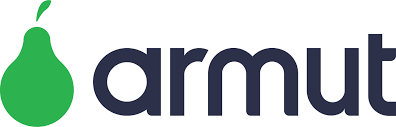

***Turkey's largest online service platform, Armut, brings together service providers and those who want to receive service.***

***It provides easy access to services such as cleaning, renovation, and transportation with a few touches on your computer or smartphone.***

***It is intended to create a product recommendation system with Association Rule Learning using the data set containing service users and the services and categories these users receive.***

###########################
## Data Set
###########################

***Data set consists of services received by customers and the categories of these services.***

***Contains date and time information for each service received.***

***UserId: Customer number***

***ServiceId: Anonymized services belonging to each category. (Example: Sofa washing service under the cleaning category)***

***A ServiceId can be found under different categories and represents different services under different categories.***

***(Example: Service with CategoryId 7 ServiceId 4 is radiator cleaning, while service with CategoryId 2 ServiceId 4 is furniture assembly)***

***CategoryId: Anonymized categories. (Example: Cleaning, transportation, renovation category)***

***CreateDate: Date the service was purchased***

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
df_ = pd.read_csv("armut_data.csv")
df = df_.copy()
df.head()

,UserId,ServiceId,CategoryId,CreateDate
0,25446,4,5,2017-08-06 16:11:00
1,22948,48,5,2017-08-06 16:12:00
2,10618,0,8,2017-08-06 16:13:00
3,7256,9,4,2017-08-06 16:14:00
4,25446,48,5,2017-08-06 16:16:00


***ServiceID represents a different service for each CategoryID.***

***A new variable is created to represent the services by combining ServiceID and CategoryID with "_".***

In [4]:
df["Hizmet"] = [str(row[1]) + "_" + str(row[2]) for row in df.values]
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Hizmet
0,25446,4,5,2017-08-06 16:11:00,4_5
1,22948,48,5,2017-08-06 16:12:00,48_5
2,10618,0,8,2017-08-06 16:13:00,0_8
3,7256,9,4,2017-08-06 16:14:00,9_4
4,25446,48,5,2017-08-06 16:16:00,48_5


***The dataset consists of the date and time the services were received, there is no basket definition (invoice etc.).***

***In order to apply Association Rule Learning, a basket (invoice etc.) definition must be created.***

***Here, the basket definition is the services received by each customer monthly. For example; customer with id 7256 represents one basket for the 9_4, 46_4 services received in the 8th month of 2017;***

***The 9_4, 38_4 services received in the 10th month of 2017 represent another basket. Baskets must be defined with a unique ID.***

***To do this, first, a new date variable containing only the year and month is created. We combine the UserID and the newly created date variable with "_" and assign it to a new variable called ID.***

In [5]:
df["CreateDate"] = pd.to_datetime(df["CreateDate"])
df.head()
df["NEW_DATE"] = df["CreateDate"].dt.strftime("%Y-%m")
df.head()
df["SepetID"] = [str(row[0]) + "_" + str(row[5]) for row in df.values]
df.head()

df[df["UserId"] == 7256 ]

,UserId,ServiceId,CategoryId,CreateDate,Hizmet,NEW_DATE,SepetID
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08,7256_2017-08
1268,7256,46,4,2017-08-09 16:15:00,46_4,2017-08,7256_2017-08
9540,7256,46,4,2017-08-29 03:53:00,46_4,2017-08,7256_2017-08
24679,7256,9,4,2017-10-01 04:59:00,9_4,2017-10,7256_2017-10
24680,7256,38,4,2017-10-01 05:01:00,38_4,2017-10,7256_2017-10
28698,7256,9,4,2017-10-11 08:06:00,9_4,2017-10,7256_2017-10
65325,7256,15,1,2017-12-31 04:17:00,15_1,2017-12,7256_2017-12
67093,7256,2,0,2018-01-03 22:06:00,2_0,2018-01,7256_2018-01
70623,7256,38,4,2018-01-11 13:07:00,38_4,2018-01,7256_2018-01
160299,7256,18,4,2018-07-25 00:51:00,18_4,2018-07,7256_2018-07


## Association Rules Generation

In [6]:
invoice_product_df = df.groupby(['SepetID', 'Hizmet'])['Hizmet'].count().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)
invoice_product_df.head()

Hizmet,0_8,10_9,11_11,12_7,13_11,14_7,15_1,16_8,17_5,18_4,19_6,1_4,20_5,21_5,22_0,23_10,24_10,25_0,26_7,27_7,28_4,29_0,2_0,30_2,31_6,32_4,33_4,34_6,35_11,36_1,37_0,38_4,39_10,3_5,40_8,41_3,42_1,43_2,44_0,45_6,46_4,47_7,48_5,49_1,4_5,5_11,6_7,7_3,8_5,9_4
SepetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0_2017-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
0_2017-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
0_2018-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
0_2018-04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10000_2017-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


***Association rules are created.***

In [7]:
frequent_itemsets = apriori(invoice_product_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
rules.head()

C:\Users\tugbe\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(13_11),(2_0),0.056627,0.130286,0.012819,0.226382,1.737574,0.005442,1.124216,0.449965
1,(2_0),(13_11),0.130286,0.056627,0.012819,0.098394,1.737574,0.005442,1.046325,0.488074
2,(15_1),(2_0),0.120963,0.130286,0.033951,0.280673,2.154278,0.018191,1.209066,0.609539
3,(2_0),(15_1),0.130286,0.120963,0.033951,0.260588,2.154278,0.018191,1.188833,0.616073
4,(15_1),(33_4),0.120963,0.027310,0.011233,0.092861,3.400299,0.007929,1.072262,0.803047


***Let's recommend a service to a user who last received service 2_0 using the arl_recommender function.***

In [9]:
def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    # sorts the rules from largest to smallest according to lift. (to catch the most compatible first product)
    # can also be sorted according to confidence, it depends on the discretion.
    recommendation_list = [] # we create an empty list for the products to be recommended.
    # antecedents: X
    # since it is called items, it brings it as a frozenset. combines the index and service.
    # i: index
    # product: X, the service that requests recommendations
    for i, product in sorted_rules["antecedents"].items():
        for j in list(product): # browse services(product):
            if j == product_id:# if the product for which recommendations are requested is caught:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"]))
                # you were holding the index information with i, add the consequents(Y) value in this index information to the recommendation_list.

# to prevent repetition in the recommendation list:
# for example, the same product may fall into the list again in 2-3 combinations;
# we are using the unique feature of the dictionary structure.
    recommendation_list = list({item for item_list in recommendation_list for item in item_list})
    return recommendation_list[:rec_count] # :rec_count bring recommended products up to the requested number.

arl_recommender(rules,"2_0", 4)

['13_11', '22_0', '38_4']